<a href="https://colab.research.google.com/github/Jeremmy18/prestamos-peru-ai/blob/main/prestamos_peru_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción del Monto de Préstamos Digitales con Python y Redes Neuronales

In [ ]:
!pip install tabulate

In [ ]:
!pip install tensorflow

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Dataset URL: https://www.kaggle.com/datasets/gregorymorales/prestamos-digitales-peru
License(s): unknown
prestamos-digitales-peru.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  prestamos-digitales-peru.zip
  inflating: dataBasePrestDigital.csv  


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


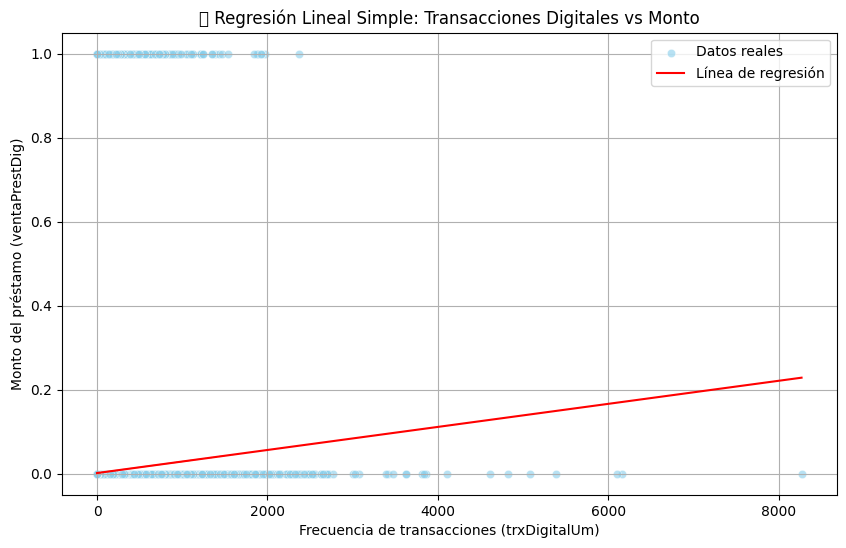

🔍 MSE: 0.002751745800495882
📈 R²: 0.004506096257275161
Epoch 1/20
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1110 - mae: 0.0116 - val_loss: 0.0025 - val_mae: 0.0052
Epoch 2/20
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0042 - mae: 0.0078 - val_loss: 0.0025 - val_mae: 0.0065
Epoch 3/20
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0031 - mae: 0.0061 - val_loss: 0.0045 - val_mae: 0.0427
Epoch 4/20
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0107 - mae: 0.0073 - val_loss: 0.0025 - val_mae: 0.0063
Epoch 5/20
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.0436 - mae: 0.0076 - val_loss: 0.0025 - val_mae: 0.0059
Epoch 6/20
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0127 - mae: 0.0065 - val_loss: 0.0025 - val_mae: 0.0061
Epoch 7/20
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 0.0028 - mae: 0.0058 - val_loss: 0.0025 - val_mae: 0.0060
Epoch 8/20
8702/8702 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0031 - mae: 0.0064 - val_loss: 0.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


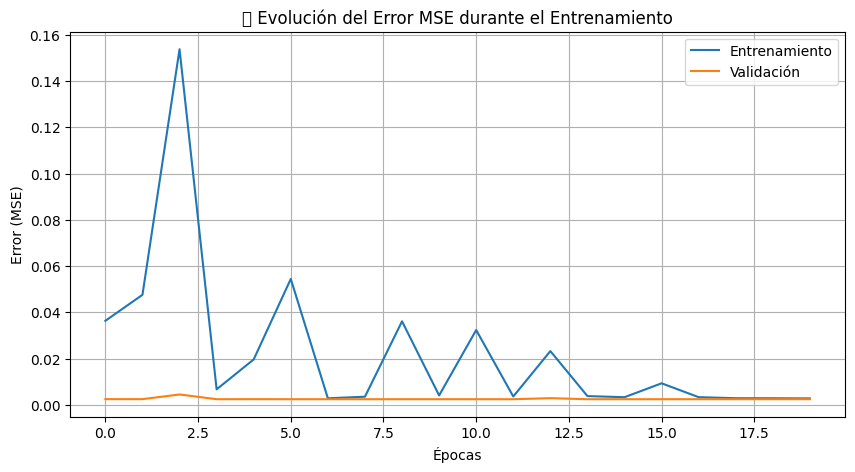

2720/2720 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


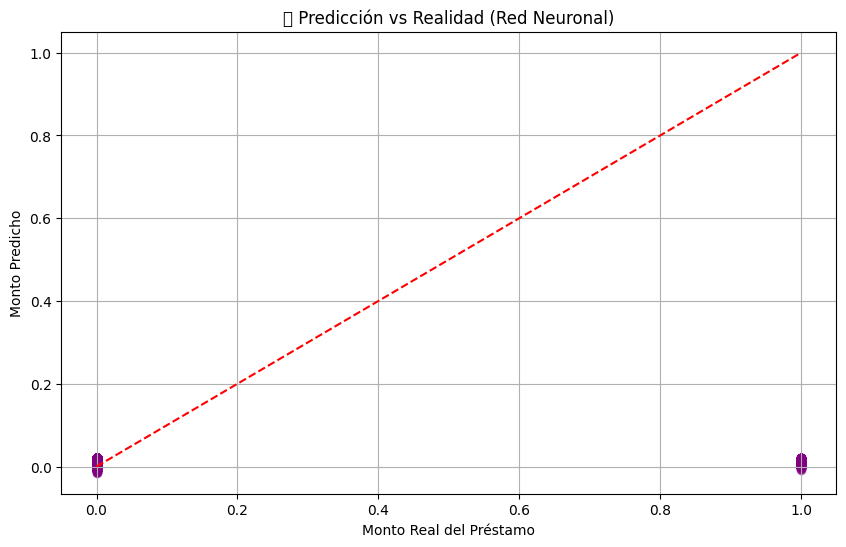

In [26]:

from google.colab import drive
drive.mount('/content/gdrive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggle"

!kaggle datasets download -d gregorymorales/prestamos-digitales-peru
!unzip -o prestamos-digitales-peru.zip

import pandas as pd

df = pd.read_csv('dataBasePrestDigital.csv', sep=';')
df = df.drop_duplicates().dropna()


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_rl = df[['trxDigitalUm']]
y_rl = df['ventaPrestDig']

modelo_rl = LinearRegression()
modelo_rl.fit(X_rl, y_rl)
y_pred_rl = modelo_rl.predict(X_rl)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_rl['trxDigitalUm'], y=y_rl, color='skyblue', label="Datos reales", alpha=0.6)
sns.lineplot(x=X_rl['trxDigitalUm'], y=y_pred_rl, color='red', label="Línea de regresión")
plt.title("📉 Regresión Lineal Simple: Transacciones Digitales vs Monto")
plt.xlabel("Frecuencia de transacciones (trxDigitalUm)")
plt.ylabel("Monto del préstamo (ventaPrestDig)")
plt.legend()
plt.grid(True)
plt.show()

print("🔍 MSE:", mean_squared_error(y_rl, y_pred_rl))
print("📈 R²:", r2_score(y_rl, y_pred_rl))


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, Input

X_nn = df[['trxDigitalUm', 'promSaldoTc3Um', 'sowPrestUm']]
y_nn = df['ventaPrestDig']

scaler = StandardScaler()
X_nn_scaled = scaler.fit_transform(X_nn)

X_train, X_test, y_train, y_test = train_test_split(X_nn_scaled, y_nn, test_size=0.2, random_state=42)

modelo_nn = models.Sequential([
    Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

modelo_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# ENTRENAR (ahora más rápido)
historial = modelo_nn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# EVALUAR
loss, mae = modelo_nn.evaluate(X_test, y_test, verbose=0)
print("\n📊 Red Neuronal")
print("🔸 MAE:", mae)
print("🔸 MSE:", loss)

# =================== GRÁFICO: EVOLUCIÓN DEL ERROR ===================
plt.figure(figsize=(10, 5))
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('📈 Evolución del Error MSE durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# =================== GRÁFICO: PREDICCIÓN VS REALIDAD ===================
y_pred_nn = modelo_nn.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.5, color='purple')
plt.xlabel('Monto Real del Préstamo')
plt.ylabel('Monto Predicho')
plt.title('🎯 Predicción vs Realidad (Red Neuronal)')
plt.plot([y_nn.min(), y_nn.max()], [y_nn.min(), y_nn.max()], 'r--')
plt.grid(True)
plt.show()